Veriyi daha iyi analiz edip görselleyebilmemiz için veriyi standart ve normalize haline getirmeden önceki temiz haliyle Keşifsel Veri Analizi yapacağız.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dff=pd.read_csv("Cleaned_Amazon_Sale_ReportDeneme.csv")
dff.head()

,index,order id,date,status,fulfilment,sales channel,ship_service_level,style,sku,category,...,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,No Promotion,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Normal Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,No Promotion,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,No Promotion,False,Normal Ship


statusü en çok cancelled olan ürün kategorisi hangisi

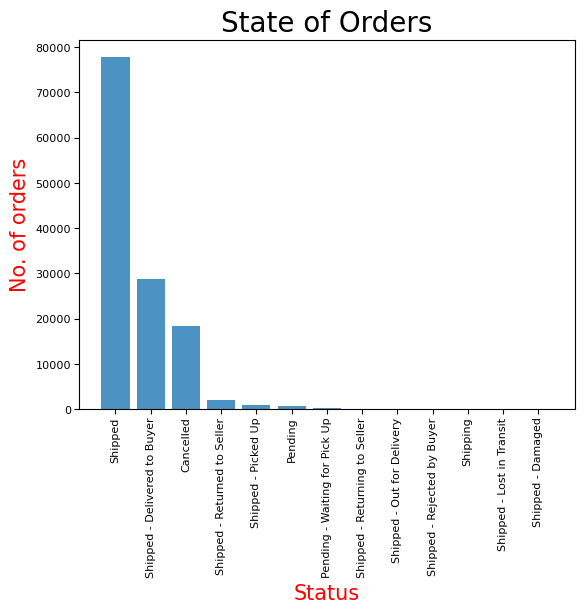

In [18]:
plt.bar(x=dff.status.value_counts().index,height=dff.status.value_counts(),alpha=0.8)
plt.xlabel("Status",fontdict={"size":15,"color":"r"})
plt.xticks(rotation=90)
plt.ylabel("No. of orders",fontdict={"size":15,"color":"r"})
plt.title("State of Orders",fontdict={"size":20,"color":"k"})
plt.tick_params(labelsize=8,pad=2)

In [54]:
dff['ship_city'].value_counts().head(10)

BENGALURU    11217
HYDERABAD     8074
MUMBAI        6126
NEW DELHI     5795
CHENNAI       5421
PUNE          3857
KOLKATA       2381
GURUGRAM      1868
THANE         1701
LUCKNOW       1458
Name: ship_city, dtype: int64

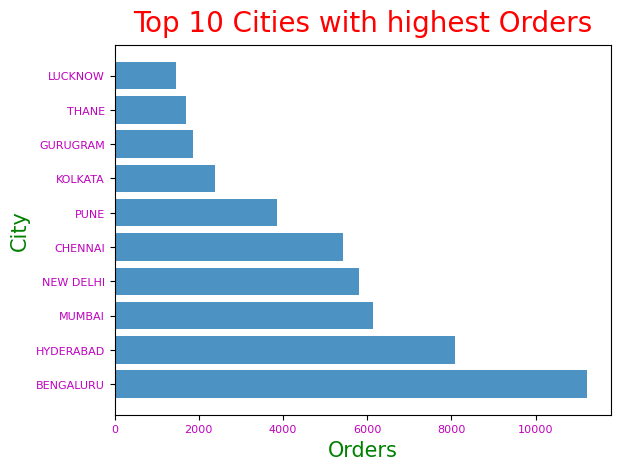

In [19]:
plt.barh(dff['ship_city'].value_counts().head(10).index,dff['ship_city'].value_counts().head(10),alpha=0.8)
plt.title("Top 10 Cities with highest Orders",pad=10,fontdict={"size":20,"color":"r"})
plt.xlabel("Orders",fontdict={"size":15,"color":"g"})
plt.ylabel("City",fontdict={"size":15,"color":"g"})
plt.tick_params(labelsize=8,labelcolor='m')
plt.show()

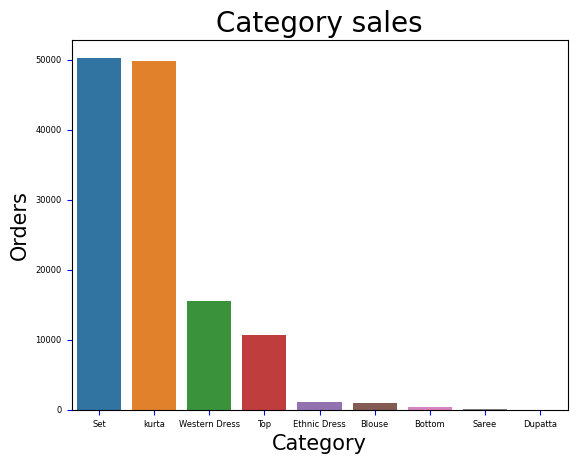

In [21]:
sns.barplot(x=dff['category'].value_counts().index,y=dff['category'].value_counts())
plt.title("Category sales",fontdict={'size':20,"color":"k"})
plt.xlabel("Category",fontdict={'size':15,"color":"k"})
plt.ylabel("Orders",fontdict={'size':15,"color":"k"})
plt.tick_params(labelsize=6,color='b')

In [3]:
dff["amount"].describe()

count    128975.000000
mean        660.631251
std         276.704296
min           0.000000
25%         459.000000
50%         635.000000
75%         835.000000
max        5584.000000
Name: amount, dtype: float64

# TOP 5 Category Most Expensive and Cheapest

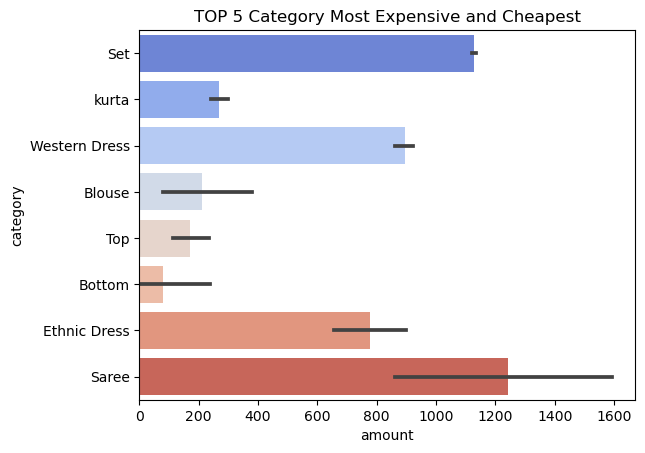

In [29]:
dffExpensiveCheapest = dff[(dff.loc[:, "amount"] > 1000) | (dff.loc[:, "amount"] < 150)]
#SEABORN FORM=sns.blabla(x=value,y=value,data=dataset,other features)
sns.barplot(x = "amount", y = "category", data=dffExpensiveCheapest, palette = "coolwarm")
plt.title("TOP 5 Category Most Expensive and Cheapest")
plt.show()

## Amazon ve Merchant Satış Tutarlarının Karşılaştırma Grafiği

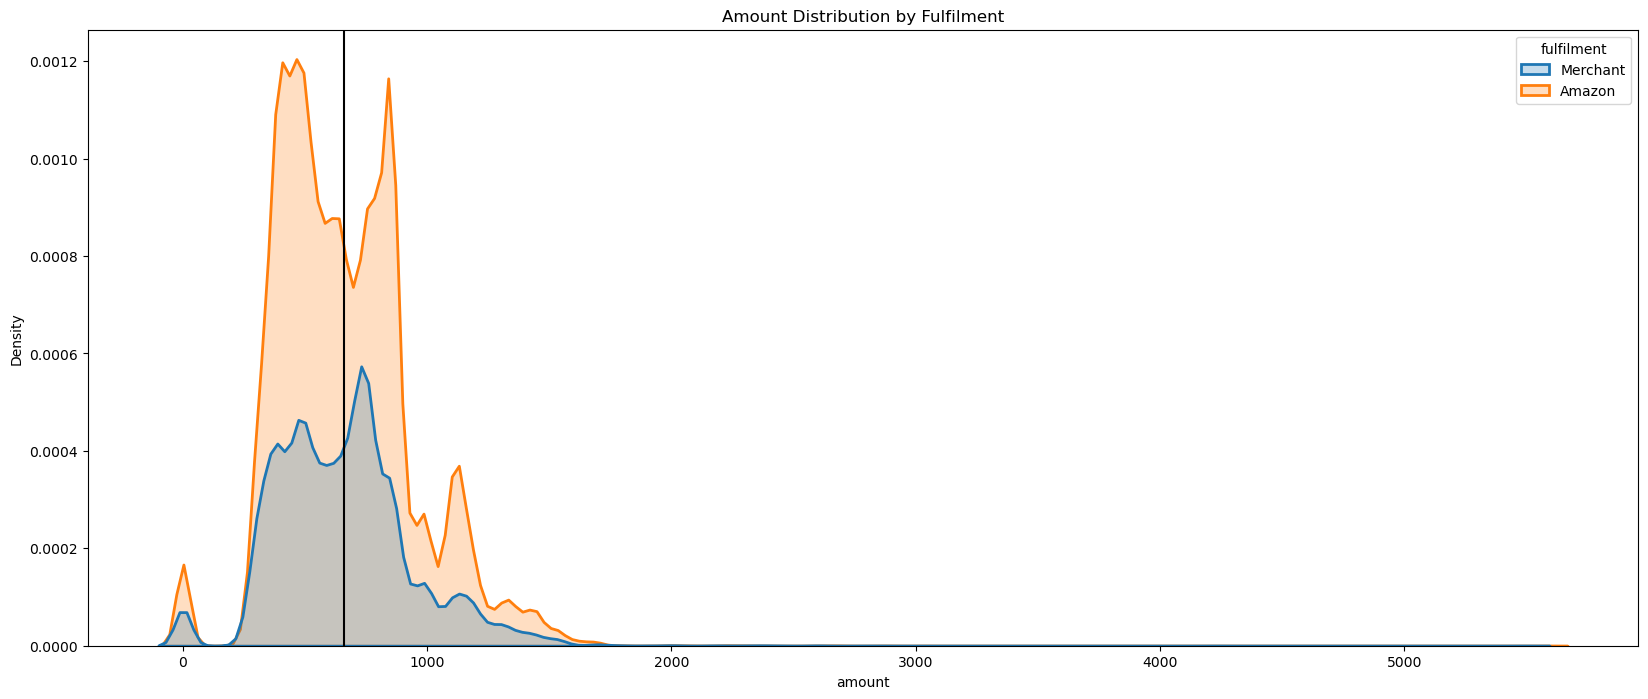

In [30]:
#FIGSIZE FORM= (figsize=(value h,value v))
#hue= adds different dimension
plt.figure(figsize = (20,8))#graphic size
sns.kdeplot(x="amount", hue="fulfilment", fill = True, linewidth = 2,data=dff)#fill=grafiğin içini doldurur.#linewidth=kenar çizgilerini kalınlaştırır.
plt.axvline(dff["amount"].mean(), c = "black")#axvline:Add a vertical line across the Axes.=>axese düşey çizgi eklemek
plt.title("Amount Distribution by Fulfilment")
plt.show()

## Set kategorisinin sayısı

In [38]:
dff[dff["category"]=="Set"].count()

index                 50284
order id              50284
date                  50284
status                50284
fulfilment            50284
sales channel         50284
ship_service_level    50284
style                 50284
sku                   50284
category              50284
size                  50284
asin                  50284
courier status        50284
qty                   50284
currency              50284
amount                50284
ship_city             50284
ship_state            50284
ship_postal_code      50284
ship_country          50284
promotion_ids         50284
b2b                   50284
fulfilled_by          50284
dtype: int64

##  statüsü iptal olan ürün kategorileri

In [35]:
cancelled_products = dff[dff['status'] == 'Cancelled']['category'].value_counts()
cancelled_products

Set              7337
kurta            7255
Western Dress    2122
Top              1276
Ethnic Dress      145
Blouse            116
Bottom             60
Saree              21
Name: category, dtype: int64

## Grafikle gösterimi

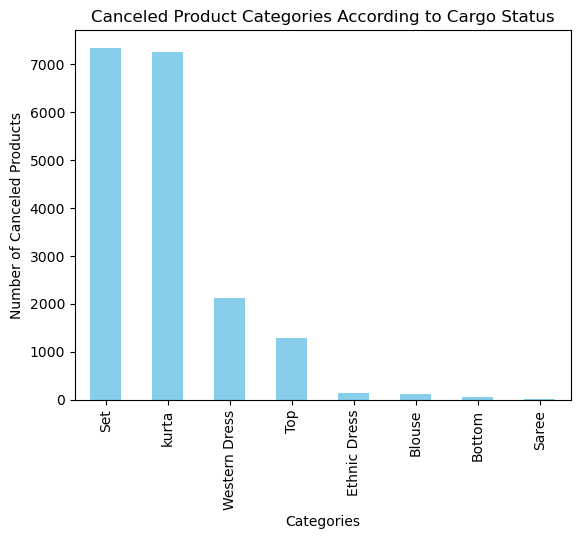

In [39]:
cancelled_products.plot(kind='bar', color='skyblue')

# Grafik başlığı ve eksiklerini ekleme
plt.title('Canceled Product Categories According to Cargo Status')
plt.xlabel('Categories')
plt.ylabel('Number of Canceled Products')

# Grafiği gösterme
plt.show()

In [47]:
dff['status'].value_counts()

Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: status, dtype: int64

## Kargo Durumunun Pasta Grafiği

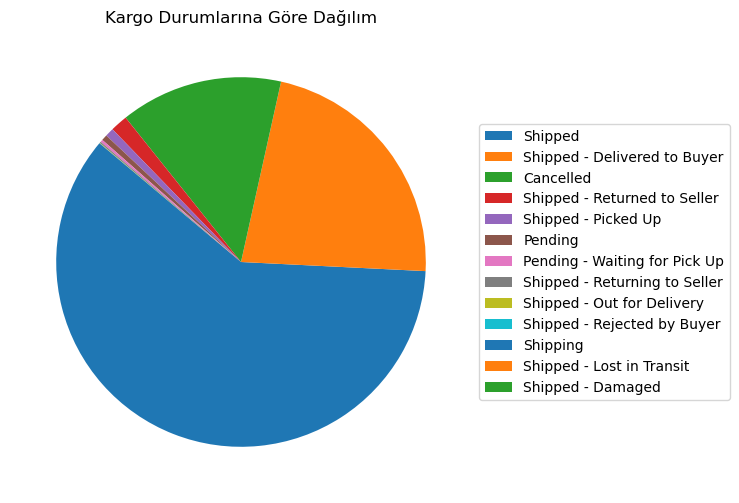

In [53]:
statusCount= dff['status'].value_counts()
plt.figure(figsize=(8, 6))
wedges, _ = plt.pie(statusCount, colors=plt.cm.tab10.colors,startangle=140)

# Renklerin hangi duruma ait olduğunu gösterme
plt.legend(wedges, statusCount.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Grafiği gösterme
plt.title('Kargo Durumlarına Göre Dağılım')
plt.show()